In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [2]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)
        return self.training_data

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    training_data = dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:10<00:00, 1213.16it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:11<00:00, 1130.01it/s]

Cats: 12476
Dogs: 12470


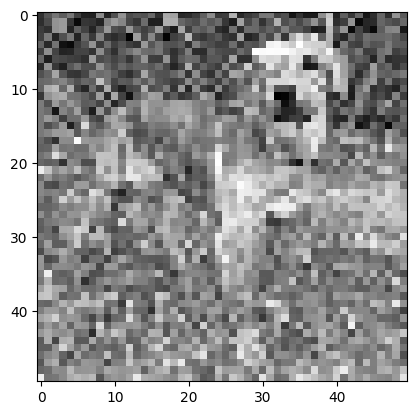

In [3]:
import matplotlib.pyplot as plt


plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(512,512)
        self.fc2 = nn.Linear(512,2)

        # x = torch.radn(50,50).view(-1,1,50,50)
        # self._to_linear = None
        # self.convs(x)

        def convs(x):
            x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

            # if self._to_linear is None:
            #     self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            return x

        def forward(self,x):
            x = self.convs(x)
            x = x.view(-1,512)
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return F.softmax(x, dim=1)

net = Net()

        


In [9]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1

val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [10]:
train_X = X[:-1*val_size]
train_y = y[:-1*val_size]

test_X = X[-1*val_size:]
test_y = y[-1*val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [11]:
BATCH_SIZE = 64
EPOCHS = 100

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

  0%|          | 0/225 [00:00<?, ?it/s]


NotImplementedError: Module [Net] is missing the required "forward" function